In [46]:
import pandas as pd

In [47]:
# Do not run this cell, it has been used to create the csv file
# import json
# 
# with open('./results/heroes.json') as f:
#   data = json.load(f)
# 
# df = pd.DataFrame(columns=['Hero', 'Rank', 'Season', 'Stat', 'Value'])
# 
# for hero, hero_data in data.items():
#     name = hero_data['name']
#     for rank, rank_data in hero_data['stats'].items():
#         for season, season_data in rank_data.items():
#             for stat, value in season_data.items():
#                 print(f'{name} - {rank} - {season} - {stat} - {value}')
#                 df = df._append({'Hero': name, 'Rank': rank, 'Season': season, 'Stat': stat, 'Value': value}, ignore_index=True)
# print(df)
# df.to_csv('./results/heroes.csv', index=False)

In [48]:
df = pd.read_csv('./results/heroes.csv')
print(df)

            Hero         Rank  Season                   Stat         Value  \
0            ana          all  ow1s03              KDA Ratio          1.19   
1            ana          all  ow1s03              Pick Rate         3.88%   
2            ana          all  ow1s03               Win Rate        37.61%   
3            ana          all  ow1s03           Eliminations   8.90/ 10min   
4            ana          all  ow1s03        Objective Kills   3.58/ 10min   
...          ...          ...     ...                    ...           ...   
124469  ramattra  grandmaster  ow2s08        Weapon Accuracy           25%   
124470  ramattra  grandmaster  ow2s08        Pummel Accuracy           67%   
124471  ramattra  grandmaster  ow2s08           Pummel Kills  12.49/ 10min   
124472  ramattra  grandmaster  ow2s08  Ravenous Vortex Kills   6.55/ 10min   
124473  ramattra  grandmaster  ow2s08     Annihilation Kills   4.52/ 10min   

        Season Index  
0                  3  
1                

In [49]:
def get_season_index(season_string: str):
    last_season_ow1 = 36
    game_version = int(season_string[2])
    season_number = int(season_string[4:])
    return (game_version - 1) * last_season_ow1 + season_number

In [50]:
# add to dataframe the column 'Season Index' with the index of the season
df['Season Index'] = df['Season'].apply(get_season_index)
print(df.columns)

Index(['Hero', 'Rank', 'Season', 'Stat', 'Value', 'Season Index'], dtype='object')


In [51]:
# save the dataframe to a csv file
df.to_csv('./results/heroes.csv', index=False)
df = pd.read_csv('./results/heroes.csv')
print(df)

            Hero         Rank  Season                   Stat         Value  \
0            ana          all  ow1s03              KDA Ratio          1.19   
1            ana          all  ow1s03              Pick Rate         3.88%   
2            ana          all  ow1s03               Win Rate        37.61%   
3            ana          all  ow1s03           Eliminations   8.90/ 10min   
4            ana          all  ow1s03        Objective Kills   3.58/ 10min   
...          ...          ...     ...                    ...           ...   
124469  ramattra  grandmaster  ow2s08        Weapon Accuracy           25%   
124470  ramattra  grandmaster  ow2s08        Pummel Accuracy           67%   
124471  ramattra  grandmaster  ow2s08           Pummel Kills  12.49/ 10min   
124472  ramattra  grandmaster  ow2s08  Ravenous Vortex Kills   6.55/ 10min   
124473  ramattra  grandmaster  ow2s08     Annihilation Kills   4.52/ 10min   

        Season Index  
0                  3  
1                

In [52]:
# get every hero sort by name
heroes = df['Hero'].unique()
heroes = sorted(heroes)
print(heroes)

['ana', 'ashe', 'baptiste', 'bastion', 'brigitte', 'cassidy', 'doomfist', 'dva', 'echo', 'genji', 'hanzo', 'illari', 'junker-queen', 'junkrat', 'kiriko', 'lifeweaver', 'lucio', 'mei', 'mercy', 'moira', 'orisa', 'pharah', 'ramattra', 'reaper', 'reinhardt', 'roadhog', 'sigma', 'sojourn', 'soldier-76', 'sombra', 'symmetra', 'torbjorn', 'tracer', 'widowmaker', 'winston', 'wrecking-ball', 'zarya', 'zenyatta']


In [53]:
# get every Stat 'Win Rate' for 'ana'
ana = df[df['Hero'] == 'ana']
ana_win_rate = ana[ana['Stat'] == 'Win Rate']
print(ana_win_rate)

     Hero         Rank  Season      Stat    Value  Season Index
2     ana          all  ow1s03  Win Rate   37.61%             3
16    ana          all  ow1s05  Win Rate  Unknown             5
30    ana          all  ow1s06  Win Rate  Unknown             6
44    ana          all  ow1s08  Win Rate   17.24%             8
58    ana          all  ow1s09  Win Rate   36.84%             9
...   ...          ...     ...       ...      ...           ...
4076  ana  grandmaster  ow2s03  Win Rate   54.96%            39
4090  ana  grandmaster  ow2s04  Win Rate   47.94%            40
4104  ana  grandmaster  ow2s05  Win Rate   41.75%            41
4118  ana  grandmaster  ow2s06  Win Rate   48.89%            42
4132  ana  grandmaster  ow2s08  Win Rate   50.13%            44

[296 rows x 6 columns]


In [100]:
import matplotlib.pyplot as plt
import numpy as np


def plot_character_stat_by_rank(character: str, stat: str, rank: str):
    # get the data
    character_df = df[df['Hero'] == character]
    character_stat = character_df[character_df['Stat'] == stat]
    character_stat_rank = character_stat[character_stat['Rank'] == rank].sort_values(by='Value')
    character_stat_rank = character_stat_rank[character_stat_rank['Value'] != 'Unknown']
    character_stat_rank['Value'] = character_stat_rank['Value'].apply(lambda x: float(x[:-1]))
    
    
    # create the plot
    plt.figure(figsize=(10, 5))
    plt.bar(character_stat_rank['Season Index'], character_stat_rank['Value'], width=1)
    plt.xticks(np.arange(0, 45, 2))
    plt.xlabel('Season')
    plt.ylabel(stat)
    plt.title(f'{stat} for {character} in {rank} Rank')
    plt.show()

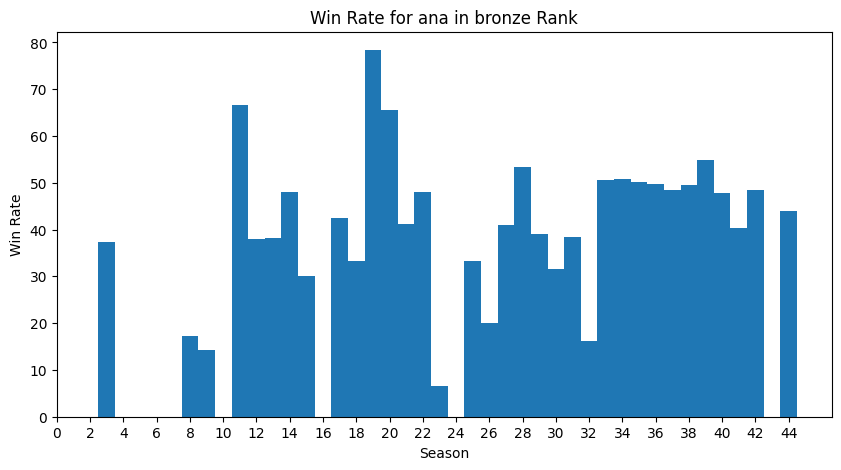

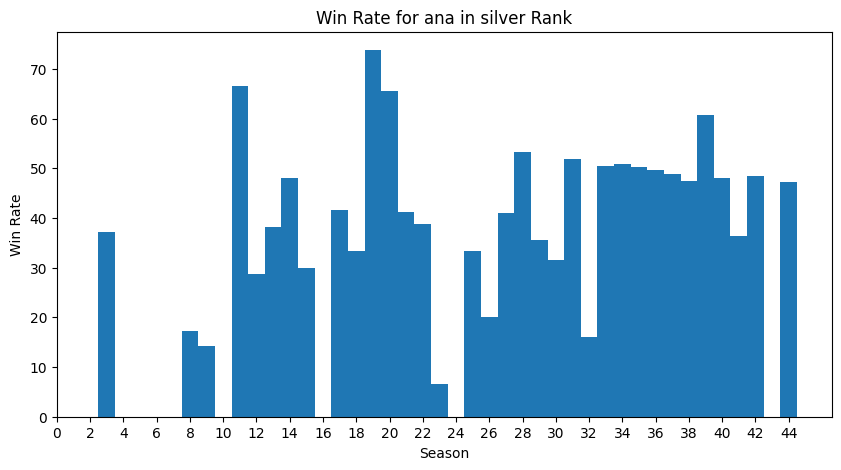

In [101]:
plot_character_stat_by_rank('ana', 'Win Rate', 'bronze')
plot_character_stat_by_rank('ana', 'Win Rate', 'silver')

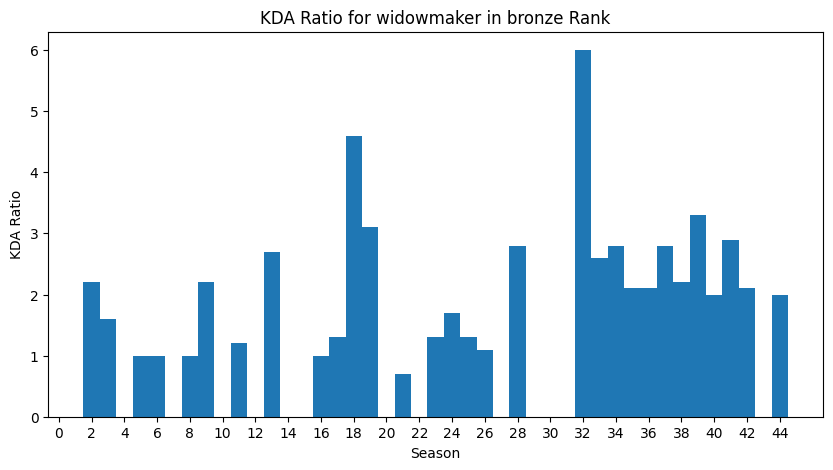

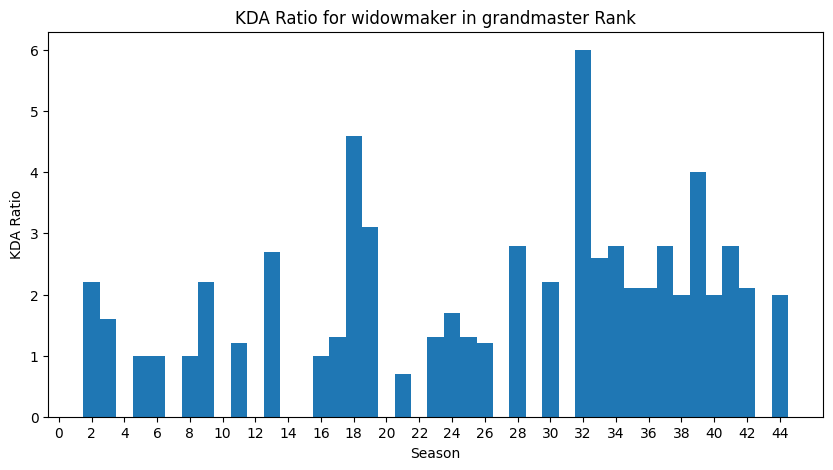

In [104]:
plot_character_stat_by_rank('widowmaker', 'KDA Ratio', 'bronze')
plot_character_stat_by_rank('widowmaker', 'KDA Ratio', 'grandmaster')